# Лабораторная работа №1. Предобработка данных

## Загрузка данных

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


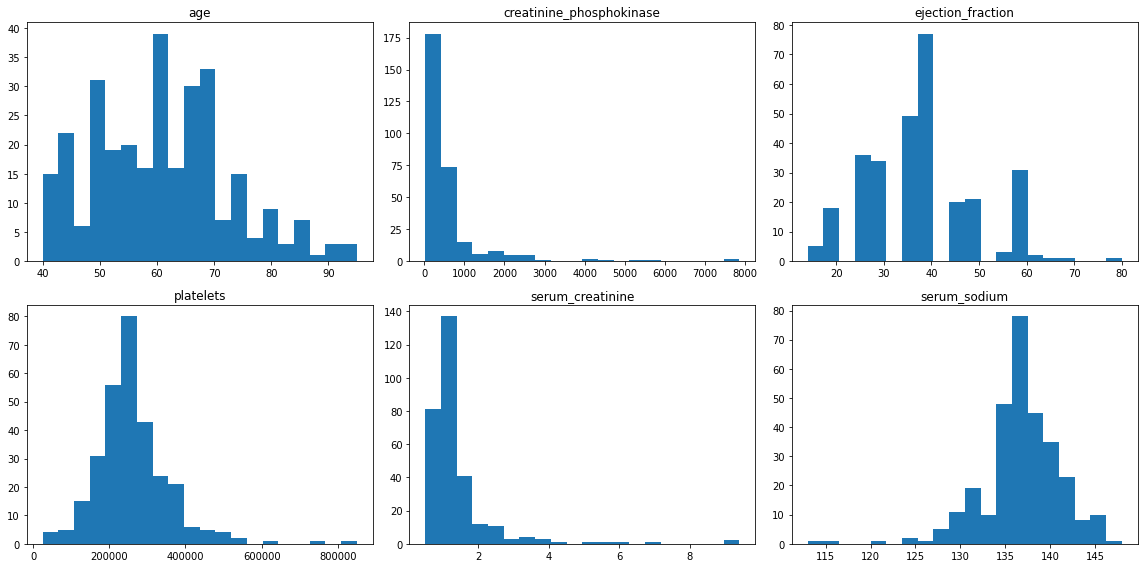

In [8]:
import matplotlib.pyplot as plt
n_bins = 20
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
# plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace=1, hspace=1)
axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [15]:
from tabulate import tabulate
min(df['age'].values)
display(tabulate([
        [min(df['age'].values), max(df['age'].values)],
        [min(df['creatinine_phosphokinase'].values), max(df['creatinine_phosphokinase'].values)],
        [min(df['ejection_fraction'].values), max(df['ejection_fraction'].values)],
        [min(df['platelets'].values), max(df['platelets'].values)],
        [min(df['serum_creatinine'].values), max(df['serum_creatinine'].values)],
        [min(df['serum_sodium'].values), max(df['serum_sodium'].values)]
    ],
    tablefmt='html',
    headers=['min', 'max'],
    showindex=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']))

,min,max
age,40,95
creatinine_phosphokinase,23,7861
ejection_fraction,14,80
platelets,25100,850000
serum_creatinine,0.5,9.4
serum_sodium,113,148


## Стандартизация данных

In [4]:
from sklearn import preprocessing
data = df.values
scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)
data_scaled_full = preprocessing.StandardScaler().fit_transform(data)

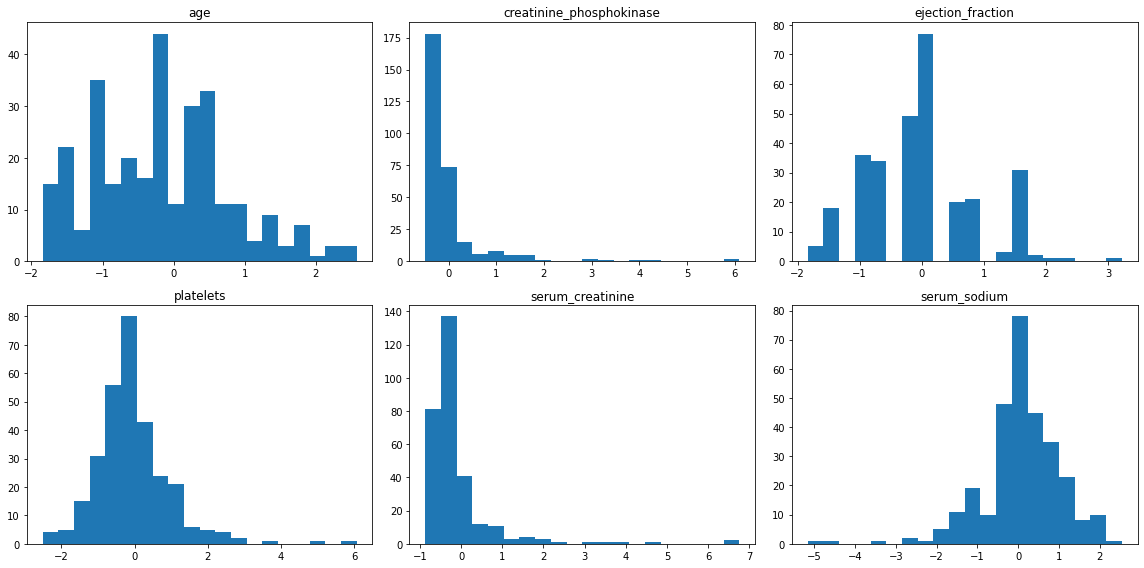

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [76]:
def get_mean_std_var(data):
    return [np.mean(col) for col in data.T], [np.std(col) for col in data.T]

mean_data, std_data = get_mean_std(data)
mean_data_scaled, std_data_scaled = get_mean_std(data_scaled)
mean_data_scaled_full, std_data_scaled_full = get_mean_std(data_scaled_full)

In [77]:
mean_data, std_data

([60.83389297658862,
  581.8394648829432,
  38.08361204013378,
  263358.02926421404,
  1.3938795986622072,
  136.62541806020067],
 [11.874901429842655,
  968.6639668032415,
  11.815033462318585,
  97640.54765451424,
  1.0327786652795918,
  4.405092379513557])

In [78]:
mean_data_scaled, std_data_scaled

([-0.16970362369106984,
  -0.021276750290383013,
  0.01050249484809085,
  -0.035228788194085287,
  -0.10864080163893569,
  0.03790759894920013],
 [0.9538237876978354,
  0.8141790488228113,
  0.9061082161919123,
  1.0150611342848024,
  0.8854288727548568,
  0.9703735961735016])

In [79]:
mean_data_scaled_full, std_data_scaled_full

([5.703353062957326e-16,
  0.0,
  -3.267546025652635e-17,
  7.723290606088045e-17,
  1.4258382657393315e-16,
  -8.673849449914267e-16],
 [0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999])

In [80]:
scaler.mean_

array([6.29466667e+01, 6.07153333e+02, 3.79466667e+01, 2.66746749e+05,
       1.52060000e+00, 1.36453333e+02])

In [81]:
scaler.var_

array([1.54997156e+02, 1.41548882e+06, 1.70023822e+02, 9.25286050e+09,
       1.36052697e+00, 2.06078222e+01])

## Приведение к диапазону

In [87]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

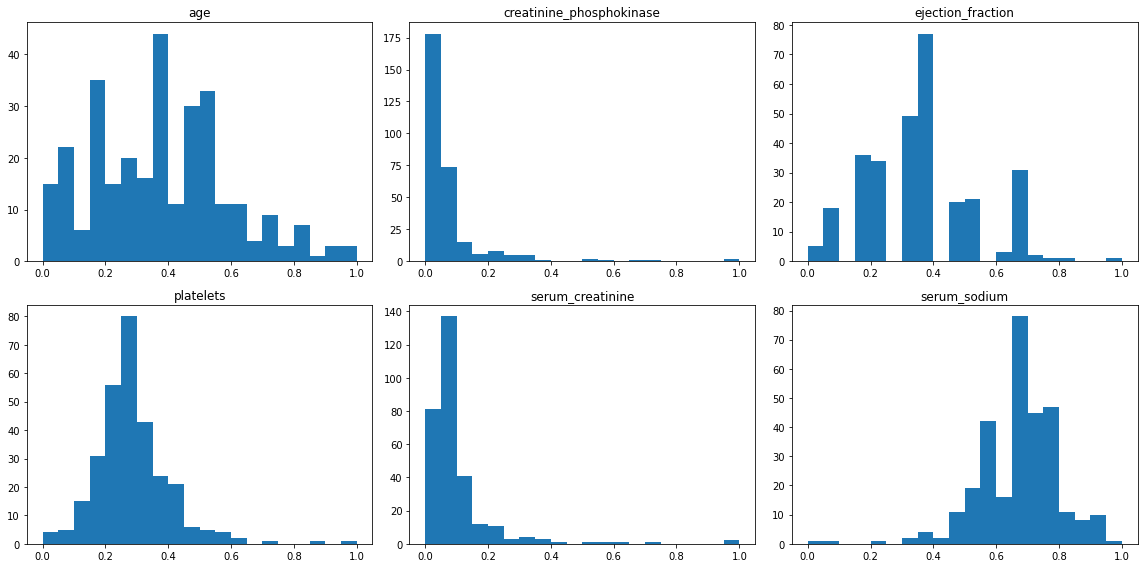

In [88]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_min_max_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_min_max_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_min_max_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_min_max_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_min_max_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_min_max_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [92]:
min_max_scaler.data_min_

array([4.00e+01, 2.30e+01, 1.40e+01, 2.51e+04, 5.00e-01, 1.13e+02])

In [93]:
min_max_scaler.data_max_

array([9.500e+01, 7.861e+03, 8.000e+01, 8.500e+05, 9.400e+00, 1.480e+02])

In [94]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)

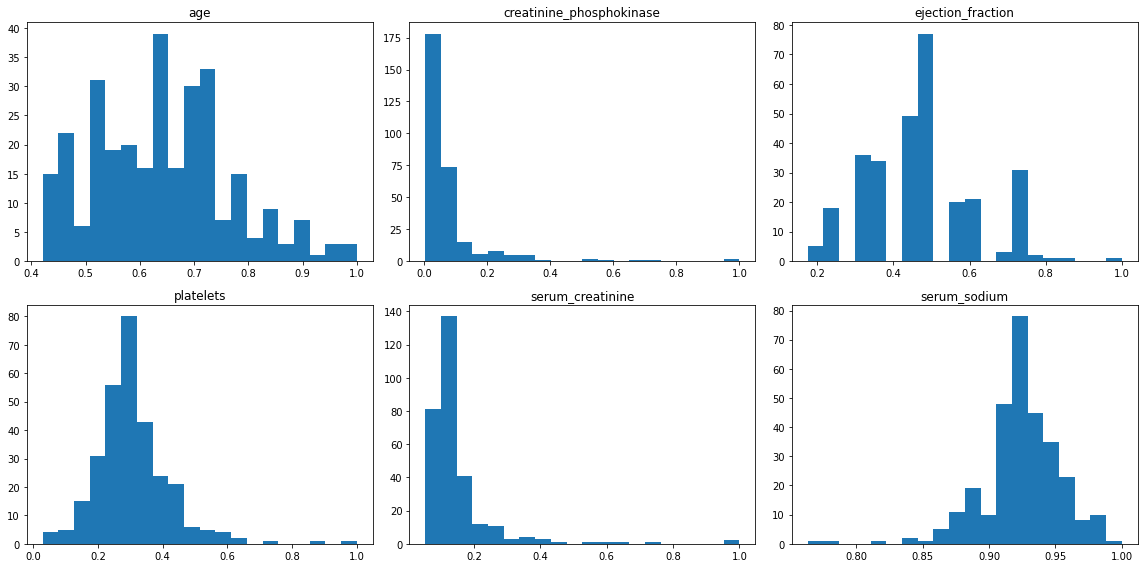

In [95]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_max_abs_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_max_abs_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_max_abs_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_max_abs_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_max_abs_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_max_abs_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [96]:
robust_scaler = preprocessing.RobustScaler().fit(data)
data_robust_scaled = robust_scaler.transform(data)

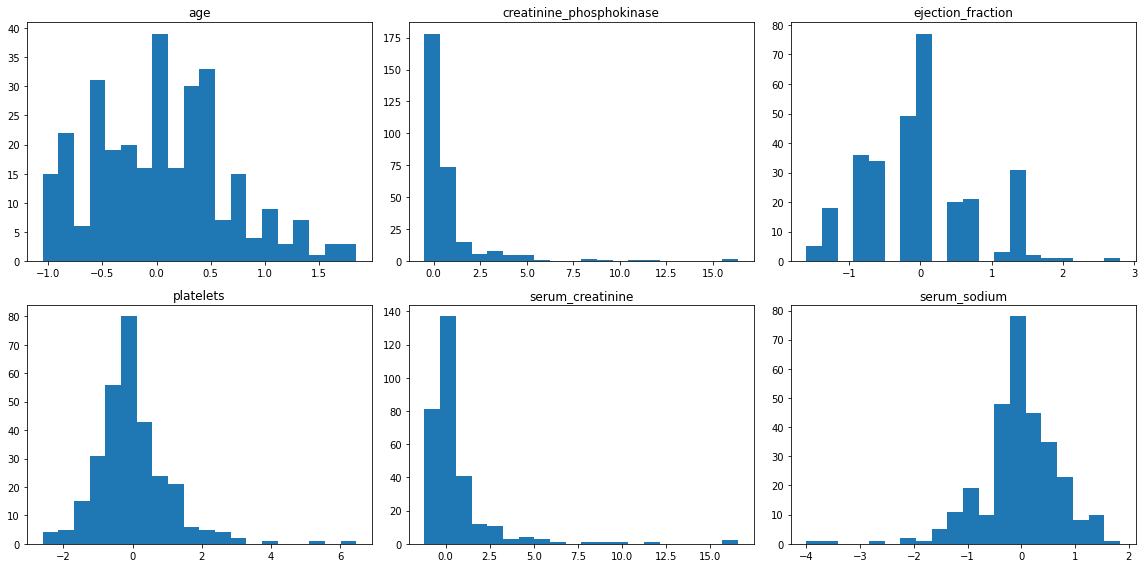

In [97]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_robust_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_robust_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_robust_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_robust_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_robust_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_robust_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [104]:
data_min_max_scaled_custom = np.array([[((x - np.min(col)) / (np.max(col) - np.min(col))) * 15 - 5 for x in col] for col in data.T]).T
data_min_max_scaled_custom

array([[ 4.54545455, -3.93021179, -3.63636364, -0.63765305, -2.64044944,
         2.28571429],
       [-0.90909091, 10.        ,  0.45454545, -0.66751067, -3.98876404,
         4.85714286],
       [ 1.81818182, -4.76460832, -3.63636364, -2.51060735, -3.65168539,
         1.85714286],
       ...,
       [-3.63636364, -1.1016841 ,  5.45454545,  8.03612559, -4.49438202,
         5.71428571],
       [-3.63636364, -0.42612911,  0.45454545, -2.91065584, -3.48314607,
         6.57142857],
       [-2.27272727, -4.66892064,  2.04545455,  1.72626985, -3.14606742,
         4.85714286]])

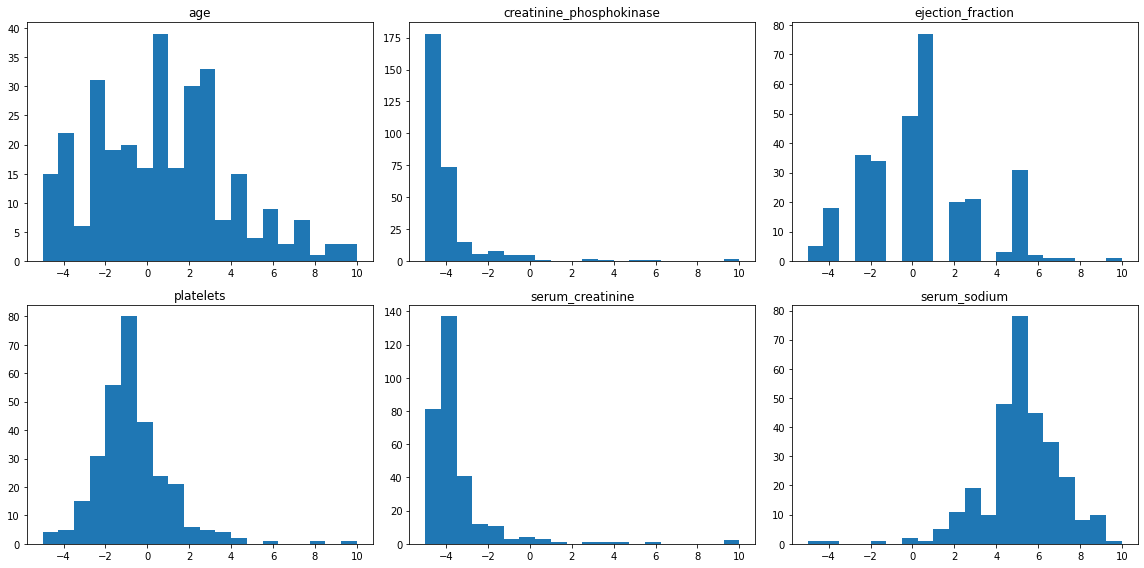

In [105]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_min_max_scaled_custom[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_min_max_scaled_custom[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_min_max_scaled_custom[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_min_max_scaled_custom[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_min_max_scaled_custom[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_min_max_scaled_custom[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

## Нелинейные преобразования

In [107]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100, random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

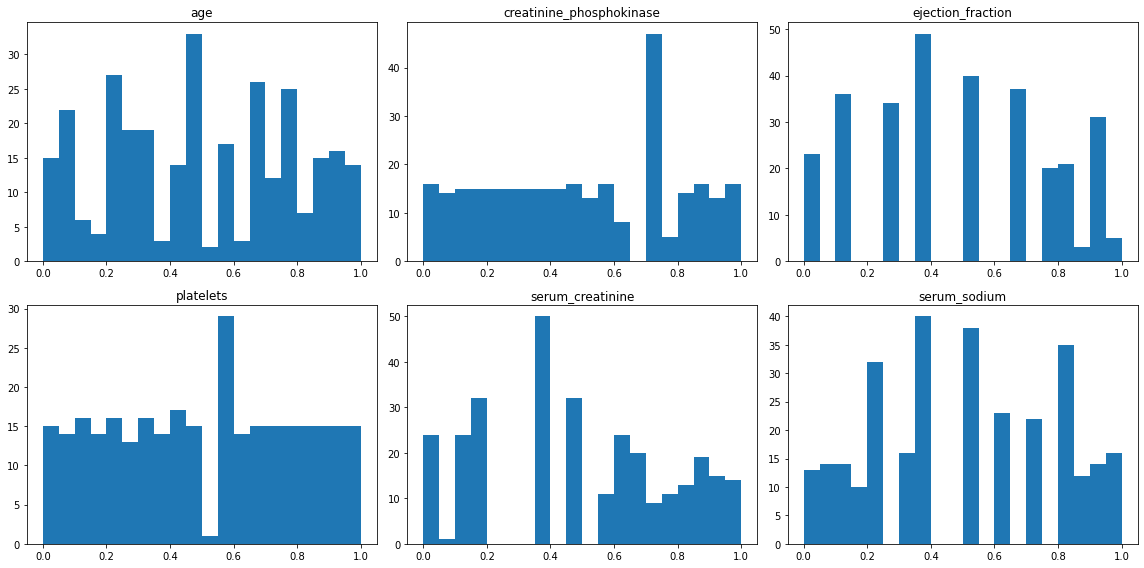

In [108]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [112]:
quantile_transformer_normal = preprocessing.QuantileTransformer(n_quantiles = 100, random_state=0, output_distribution='normal').fit(data)
data_quantile_scaled_normal = quantile_transformer_normal.transform(data)

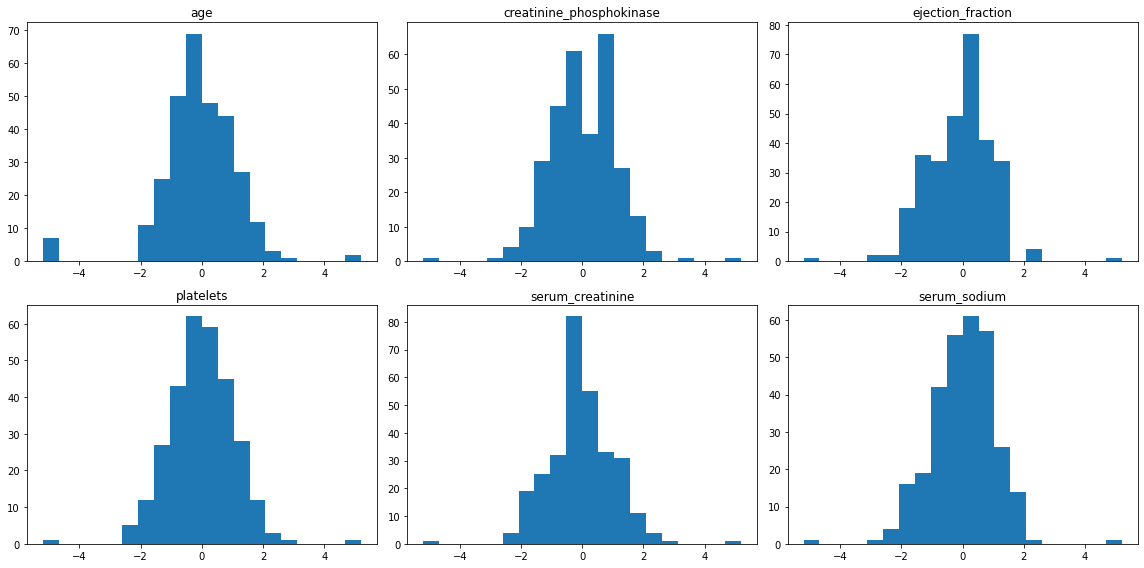

In [113]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_quantile_scaled_normal[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_quantile_scaled_normal[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_quantile_scaled_normal[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_quantile_scaled_normal[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_quantile_scaled_normal[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_quantile_scaled_normal[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [11]:
power_transformer = preprocessing.PowerTransformer().fit(data)
data_power_scaled = power_transformer.transform(data)

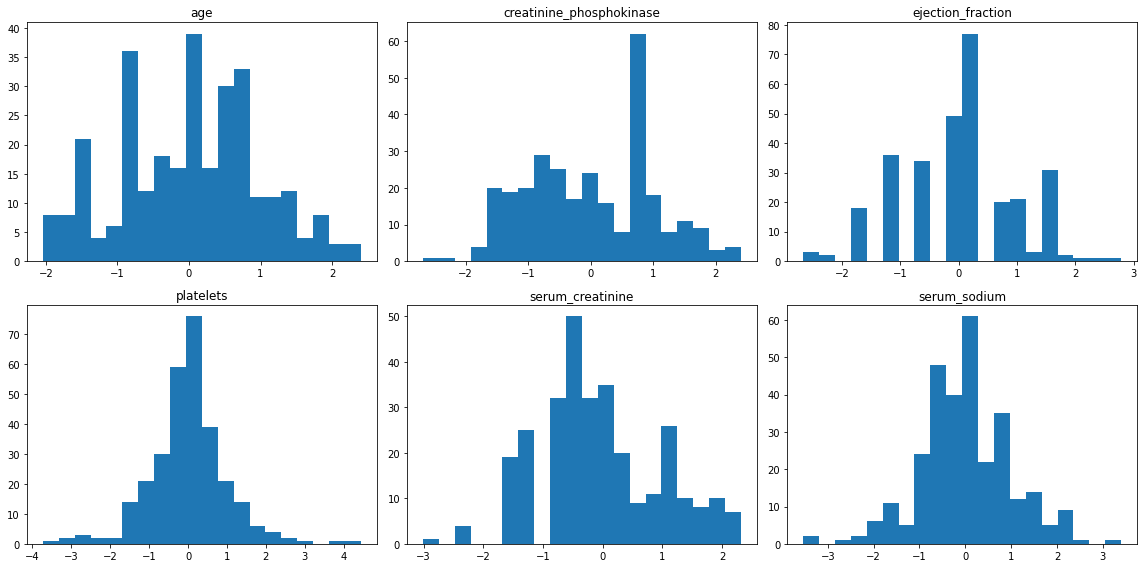

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_power_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_power_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_power_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_power_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_power_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_power_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

## Дискретизация признаков

In [14]:
bins_discretizer = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal').fit(data)
data_bins_discretized = bins_discretizer.transform(data)

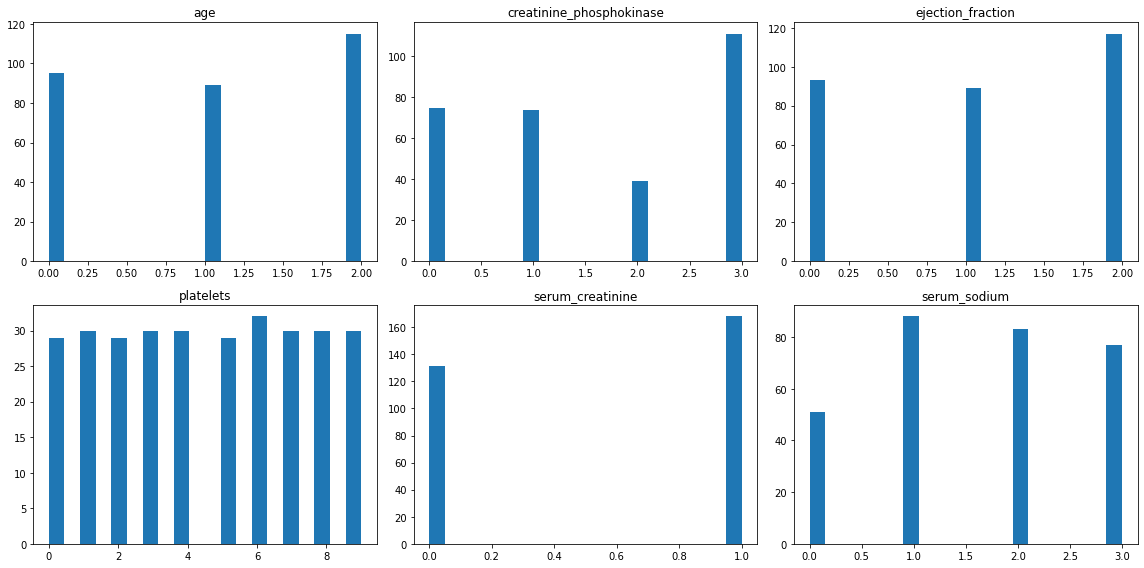

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs[0, 0].hist(data_bins_discretized[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_bins_discretized[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_bins_discretized[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_bins_discretized[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_bins_discretized[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_bins_discretized[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
fig.tight_layout()
plt.show()

In [16]:
bins_discretizer.bin_edges_

array([array([40., 55., 65., 95.]),
       array([  23. ,  116.5,  250. ,  582. , 7861. ]),
       array([14., 35., 40., 80.]),
       array([ 25100., 153000., 196000., 221000., 237000., 262000., 265000.,
       285200., 319800., 374600., 850000.]),
       array([0.5, 1.1, 9.4]), array([113., 134., 137., 140., 148.])],
      dtype=object)